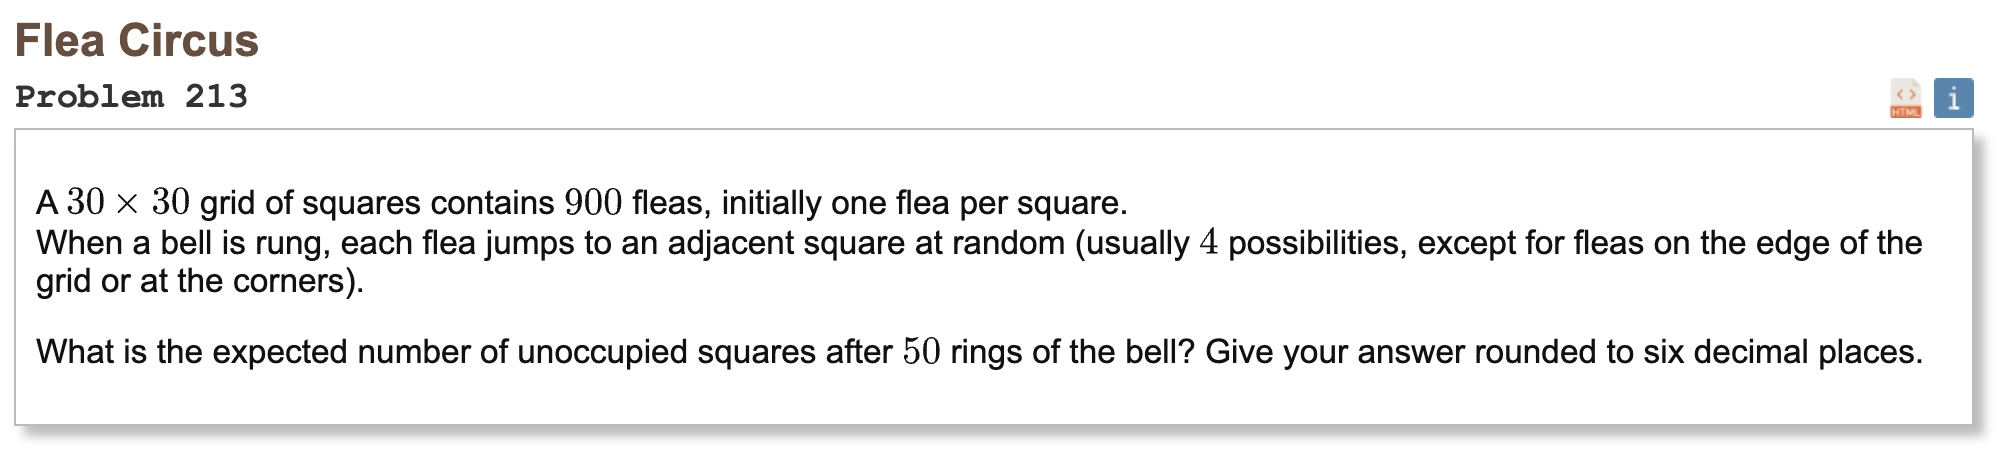

## Initial approach

* model each flea as an independent random walk on a 30 by 30 grid
* after 50 rings, a square is empty if every flea is somewhere else
* for a fixed target square, the empty probability is the product over all starting squares of (1 minus the flea landing probability)
* compute those landing probabilities by evolving a 2d probability grid for each starting square for 50 steps
* speed it up by updating with 4 shifted adds (up, down, left, right) using the rule that each cell splits its mass equally among its available neighbors
* accumulate log probabilities with log1p to avoid underflow when multiplying many small terms
* sum the empty probabilities over all squares to get the expected number of unoccupied squares
* use numpy for fast array updates and stable log1p and exp

In [1]:
import numpy as np

def solve(n=30, steps=50):
    deg = np.full((n, n), 4.0, dtype=np.float64)
    deg[0, 0] = deg[0, -1] = deg[-1, 0] = deg[-1, -1] = 2.0
    deg[0, 1:-1] = deg[-1, 1:-1] = 3.0
    deg[1:-1, 0] = deg[1:-1, -1] = 3.0

    log_empty = np.zeros(n * n, dtype=np.float64)

    for start in range(n * n):
        r, c = divmod(start, n)
        p = np.zeros((n, n), dtype=np.float64)
        p[r, c] = 1.0

        for _ in range(steps):
            q = p / deg
            nxt = np.zeros_like(p)
            nxt[:-1, :] += q[1:, :]
            nxt[1:, :] += q[:-1, :]
            nxt[:, :-1] += q[:, 1:]
            nxt[:, 1:] += q[:, :-1]
            p = nxt

        log_empty += np.log1p(-p.ravel())

    expected_unoccupied = float(np.exp(log_empty).sum())
    return expected_unoccupied

In [2]:
%%time
result = solve()
print("Result:", f"{result:.6f}")

Result: 330.721154
CPU times: user 335 ms, sys: 5.05 ms, total: 340 ms
Wall time: 339 ms
